# SPAM EMAIL DETECTION

In [31]:
import pandas as pd

In [5]:
df= pd.read_csv(r'/home/rguktongole/Downloads/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# x contains the values of message column
x=df.iloc[:,1:2].values
x

array([['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['Ok lar... Joking wif u oni...'],
       ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       ['Pity, * was in mood for that. So...any other suggestions?'],
       ["The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       ['Rofl. Its true to its name']], dtype=object)

In [9]:
# y contains the values of catogary column
y=df.iloc[:,0:1]
y


,Category
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [11]:
#LabelEncoder converts categorical labels into numerical form (0 for 'ham', 1 for 'spam').
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [12]:
#CountVectorizer converts the text messages into a numerical matrix of token counts.
#This matrix is sparse (many zeros) and represents the frequency of words in the messages.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['Message'])


In [14]:
# splitting the data into training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)


In [15]:
# Logistic Regression
# LogisticRegression is trained on the training data and used to predict categories for the test data.
# Predictions are stored in pred.
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()
model = l.fit(x_train, y_train)
pred = model.predict(x_test)


In [16]:
# accuracy_score measures the overall accuracy of the model.
# classification_report provides precision, recall, and F1-score for each class.
from sklearn.metrics import accuracy_score, classification_report
print("accuracy score is ", accuracy_score(y_test, pred))
print("classfication-report  is : \n \n ", classification_report(y_test, pred))


accuracy score is  0.979372197309417
classfication-report  is : 
 
                precision    recall  f1-score   support

           0       0.98      1.00      0.99       960
           1       0.98      0.87      0.92       155

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



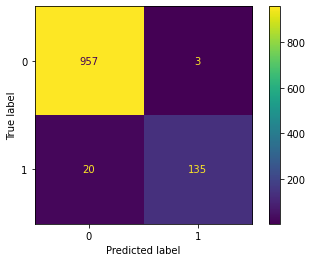

In [17]:
# Confusion Matrix
# confusion_matrix computes the confusion matrix.
# ConfusionMatrixDisplay visualizes the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
c = confusion_matrix(y_test, pred)
cmat = ConfusionMatrixDisplay(confusion_matrix=c)
cmat.plot()


In [22]:
# Random Forest Classifier
# RandomForestClassifier is trained and used for predictions.
# Results are evaluated similarly to Logistic Regression.
#2.random forest classifier
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

model=r.fit(x_train,y_train)

pred=model.predict(x_test)
pred


array([1, 0, 1, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import accuracy_score,classification_report

print("accuracy score is ",accuracy_score(y_test,pred))
print("classfication-report  is : \n \n ",classification_report(y_test,pred))


accuracy score is  0.9757847533632287
classfication-report  is : 
 
                precision    recall  f1-score   support

           0       0.97      1.00      0.99       960
           1       1.00      0.83      0.90       155

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.97      1115



[[960   0]
 [ 27 128]]


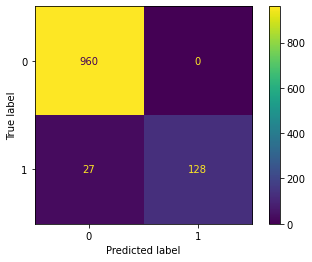

In [24]:
#ploting the values

#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
c=confusion_matrix(y_test,pred)
print(c)

cmat=ConfusionMatrixDisplay(confusion_matrix=c)
cmat.plot()


In [25]:
#3.adaboosting classifier
from sklearn.ensemble import AdaBoostClassifier
a=AdaBoostClassifier()
a

model=a.fit(x_train,y_train)
model

pred=model.predict(x_test)
pred

/home/rguktongole/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


array([1, 0, 0, ..., 1, 0, 0])

In [26]:
from sklearn.metrics import accuracy_score,classification_report

print("accuracy score is ",accuracy_score(y_test,pred))
print("classfication-report  is : \n \n ",classification_report(y_test,pred))

accuracy score is  0.9632286995515695
classfication-report  is : 
 
                precision    recall  f1-score   support

           0       0.97      0.99      0.98       960
           1       0.95      0.78      0.86       155

    accuracy                           0.96      1115
   macro avg       0.96      0.89      0.92      1115
weighted avg       0.96      0.96      0.96      1115



[[953   7]
 [ 34 121]]


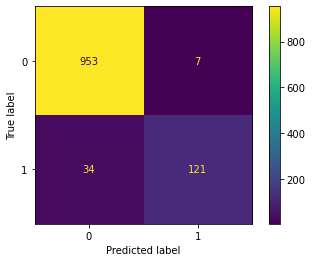

In [27]:
#ploting the values

#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
c=confusion_matrix(y_test,pred)
print(c)

cmat=ConfusionMatrixDisplay(confusion_matrix=c)
cmat.plot()

In [28]:
#4.knn

from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

model=k.fit(x_train,y_train) 
pred=model.predict(x_test) 
print("predicted values is ",pred)

predicted values is  [1 0 1 ... 0 0 0]


In [29]:
from sklearn.metrics import accuracy_score,classification_report

print("accuracy score is ",accuracy_score(y_test,pred))
print("classfication-report  is : \n \n ",classification_report(y_test,pred))

accuracy score is  0.9165919282511211
classfication-report  is : 
 
                precision    recall  f1-score   support

           0       0.91      1.00      0.95       960
           1       1.00      0.40      0.57       155

    accuracy                           0.92      1115
   macro avg       0.96      0.70      0.76      1115
weighted avg       0.92      0.92      0.90      1115



[[960   0]
 [ 93  62]]


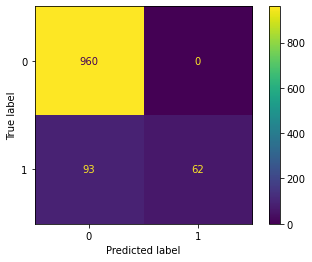

In [30]:
#ploting the values

#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
c=confusion_matrix(y_test,pred)
print(c)

cmat=ConfusionMatrixDisplay(confusion_matrix=c)
cmat.plot()